# <center>Rock Paper Scissors Classification using CNN</center>

### Group Members:

* 1811087 - Ayush Khade
* 1811093 - Mihir Mehta
* 1811094 - Kaushik Metha
* 1811099 - Saurabh Nambiar
* 1811128 - Ajay Bhan

Our topic is classification of images based on a classic entertainment game: **Rock-Paper-Scissors**.
The tensorflow dataset consisting of 2520 images is used.

We trained a custom CNN model which **overfits** the dataset. To improve the validation and testing accuracy, we used **transfer learning** approach. We applied the **VGG16** model. 

Further, we test the model on test images and receive an accuracy of ~94%. 

We **visualise** the model and summarise each layer's output. 


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/AMLTF IA

/content/drive/MyDrive/Colab Notebooks/AMLTF IA


## Image Classification

Image classification is the process of taking an 


input (like a picture) and outputting a class (like “cat”) or a probability that the input is a particular class (“there’s a 90% probability that this input is a cat”). 
A CNN generally has

    Convolutional layers
    ReLU layers
    Pooling layers
    a Fully connected layer.
A CNN convolves (not convolutes…) learned features with input data and uses 2D convolutional layers. This means that this type of network is ideal for processing 2D images. Compared to other image classification algorithms, CNNs actually use very little preprocessing. This means that they can learn the filters that have to be hand-made in other algorithms. 

As mentioned earlier, this dataset composes of 2520 images and is divided into 3 classes: **Rock Paper Scissors**.



## Imports

In [ ]:
# importing essential librarires

import numpy as np
import cv2
import keras
import pandas as pd
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.layers import *
from keras.models import Model, Sequential, load_model
from keras.applications.vgg16 import VGG16
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline
import os
from keras.preprocessing.image import ImageDataGenerator 
import random

## Sample Images

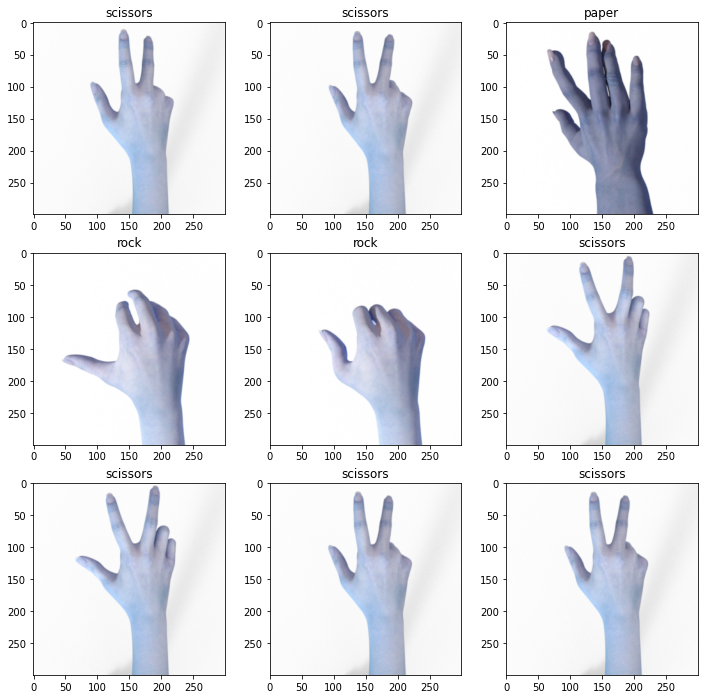

In [ ]:
# view sample images

labels = ['paper', 'rock', 'scissors']
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
for i in range(3):
  for j in range(3):
    num = random.randint(0, 2)
    label = labels[num]
    files = os.listdir(f"rps/{label}")
    num = random.randint(0, 100)
    img = cv2.imread(f"rps/{label}/{files[num]}")
    ax[i][j].set_title(f"{label}")
    ax[i][j].imshow(img)
  

In [ ]:
img = cv2.imread("rps/paper/paper01-001.png")
img.shape

(300, 300, 3)

In [ ]:
# declaring constants

IMG_HEIGHT = 150
IMG_WIDTH = 150
CHANNELS = 3
batch_size = 32

## Data Augmentation
The performance of deep learning neural networks often improves with the amount of data available.
Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.

It is used to expand the training dataset in order to improve the performance and ability of the model to generalize.



The intent is to expand the training dataset with new, plausible examples

Image data augmentation is typically only applied to the training dataset, and not to the validation or test dataset. 

In [ ]:
# applies transformations such as flips, shear, zooms at run time
train_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)
 
# Loading training dataset from rps directory
train_generator = train_gen.flow_from_directory(
    'rps/',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical',
)
 
# Loading validation dataset from rps-test-set directory
val_generator = train_gen.flow_from_directory(
    'rps-test-set/',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical',
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


## Classification Model

As discussed above, we created a custom CNN model with a sequential model consisting of 4 Conv + MaxPool Layers with activation function as ReLU. We add the dropout layer, and in the last dense layer, we use the Softmax activation function to give the probabilites of each class.


*  A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
*   ReLU Activation Function : f(x)=max(0,x)

    The ReLU function is simple and it consists of no heavy computation as there is no complicated math.

* Dropout is a technique used to prevent a model from overfitting. Dropout works by randomly setting the outgoing edges of hidden units (neurons that make up hidden layers) to 0 at each update of the training phase.

* The softmax activation dealing with multi-class classification problems, as it will report back the “confidence score” for each class. Since we’re dealing with probabilities here, the scores returned by the softmax function will add up to 1.
The predicted class is, therefore, the item in the list where confidence score is the highest.



In [ ]:
model = Sequential() 
model.add(Conv2D(input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS), filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(0.05)))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

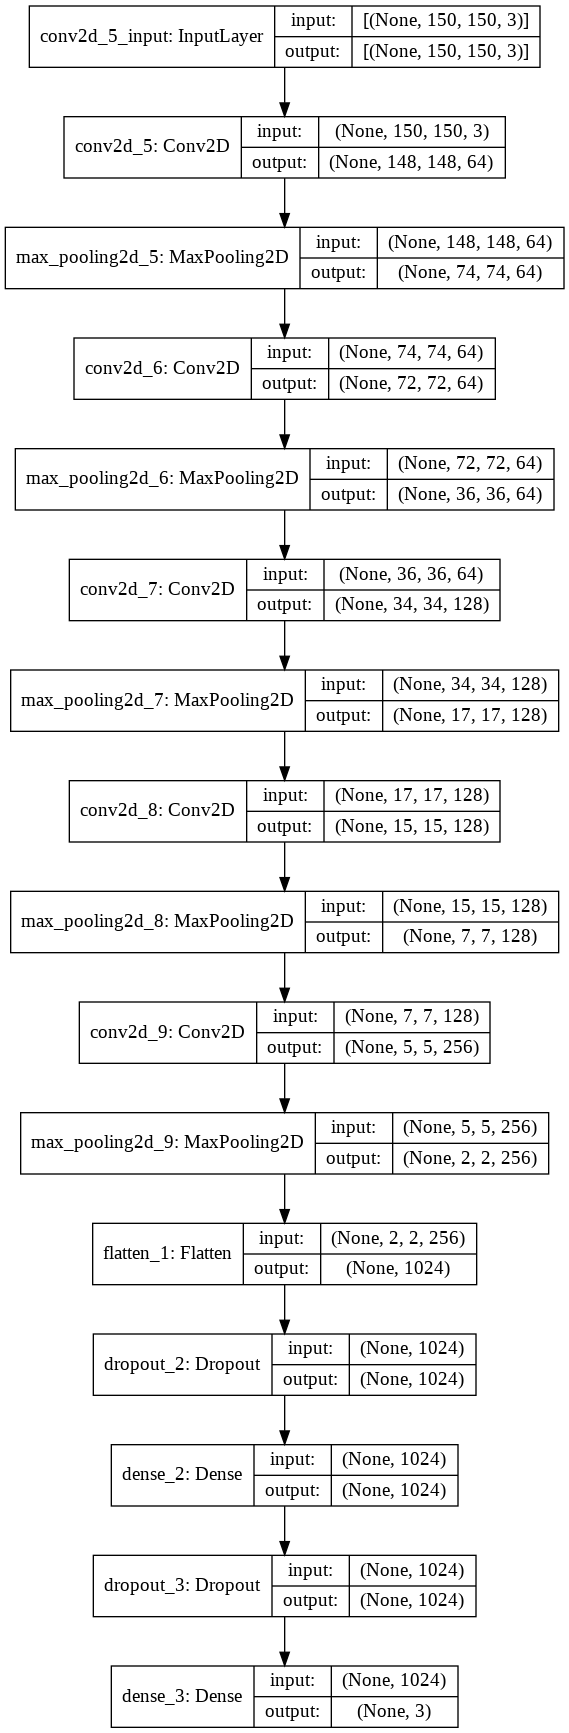

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
hist = model.fit(train_generator, validation_data=val_generator, epochs=50)

Epoch 1/50
79/79 [==============================] - 24s 305ms/step - loss: 1.3794 - accuracy: 0.3381 - val_loss: 1.3472 - val_accuracy: 0.3522
Epoch 2/50
79/79 [==============================] - 24s 298ms/step - loss: 1.3379 - accuracy: 0.3445 - val_loss: 1.3101 - val_accuracy: 0.3575
Epoch 3/50
79/79 [==============================] - 24s 299ms/step - loss: 1.3014 - accuracy: 0.3483 - val_loss: 1.2781 - val_accuracy: 0.3952
Epoch 4/50
79/79 [==============================] - 23s 297ms/step - loss: 1.2705 - accuracy: 0.3572 - val_loss: 1.2508 - val_accuracy: 0.4328
Epoch 5/50
79/79 [==============================] - 23s 297ms/step - loss: 1.2443 - accuracy: 0.3743 - val_loss: 1.2273 - val_accuracy: 0.4812
Epoch 6/50
79/79 [==============================] - 23s 296ms/step - loss: 1.2204 - accuracy: 0.3927 - val_loss: 1.2069 - val_accuracy: 0.3737
Epoch 7/50
79/79 [==============================] - 24s 298ms/step - loss: 1.1994 - accuracy: 0.4081 - val_loss: 1.1903 - val_accuracy: 0.3871

In [ ]:
df = pd.DataFrame(hist.history)
df.to_csv("overfit_loss.csv", index=False)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.368391,0.342857,1.347190,0.352151
1,1.327737,0.356746,1.310140,0.357527
2,1.293802,0.357540,1.278129,0.395161
3,1.263449,0.363095,1.250750,0.432796
4,1.237637,0.375794,1.227260,0.481183


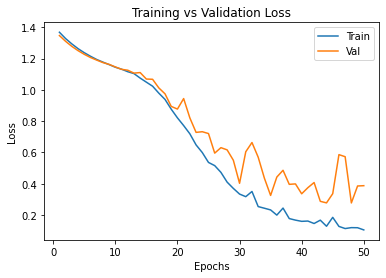

In [ ]:
# Training vs Validation Loss

x = list(range(1, 51))
plt.plot(x, df['loss'])
plt.plot(x, df['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend(labels=['Train', 'Val'])
plt.show()

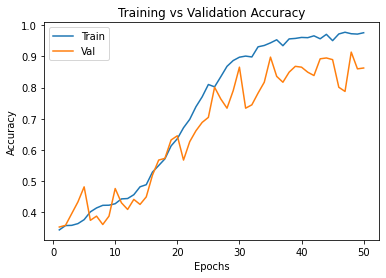

In [ ]:
# Training vs Validation Accuracy

df = pd.read_csv("overfit_loss.csv")
plt.plot(x, df['accuracy'])
plt.plot(x, df['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend(labels=['Train', 'Val'])
plt.show()

In [ ]:
model.save('overfit.h5')

## Transfer Learning Appraoch Using VGG-16 Model
Top performing models can be downloaded and used directly, or integrated into a new model for your own computer vision problems.

Transfer learning is flexible, allowing the use of pre-trained models directly, as feature extraction preprocessing, and integrated into entirely new models.

transfer learning is a technique whereby a neural network model is first trained on a problem similar to the problem that is being solved. One or more layers from the trained model are then used in a new model trained on the problem of interest.

Transfer learning has the benefit of decreasing the training time for a neural network model and can result in lower generalization error.

VGG-16 contains 16 layers including 13 convolution layers and 3 dense layers.


<img src = "https://neurohive.io/wp-content/uploads/2018/11/vgg16.png">
<br>

Most unique thing about VGG16 is that instead of having a large number of hyper-parameter they focused on having convolution layers of 3x3 filter with a stride 1 and always used same padding and maxpool layer of 2x2 filter of stride 2. It follows this arrangement of convolution and max pool layers consistently throughout the whole architecture.

In [ ]:
# tranfer learning approach using VGG-16 model

vgg = VGG16(weights='imagenet', input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS), include_top=False)
for layer in vgg.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_12 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 8192)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 1024)              8389632   
_________________________________________________________________
dropout_18 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 3)                 3075      
Total params: 23,107,395
Trainable params: 8,392,707
Non-trainable params: 14,714,688
_________________________________

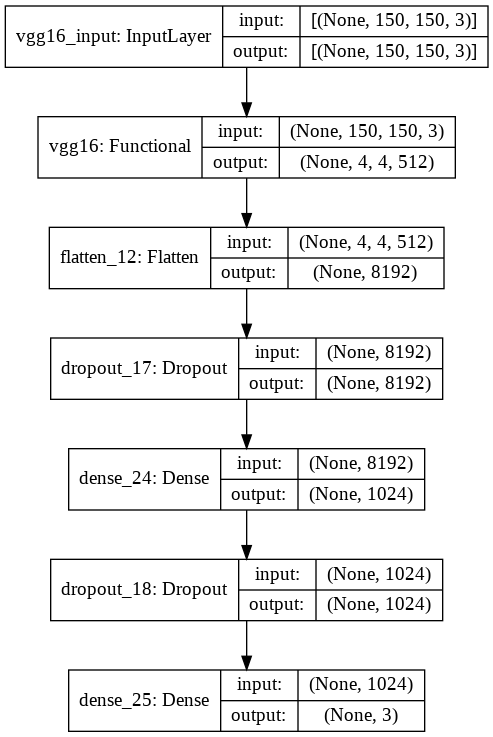

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# threshold = 3% to stop training
class CustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):

        if abs(logs['val_accuracy'] - logs['accuracy']) < 0.03:
            self.model.stop_training = True


In [ ]:
hist1 = model.fit(train_generator, validation_data=val_generator, epochs=10, callbacks=[CustomCallback()])

Epoch 1/10
79/79 [==============================] - 26s 319ms/step - loss: 0.9528 - accuracy: 0.7542 - val_loss: 0.0806 - val_accuracy: 0.9651
Epoch 2/10
79/79 [==============================] - 25s 315ms/step - loss: 0.0534 - accuracy: 0.9800 - val_loss: 0.1811 - val_accuracy: 0.9194
Epoch 3/10
79/79 [==============================] - 25s 313ms/step - loss: 0.0403 - accuracy: 0.9853 - val_loss: 0.4415 - val_accuracy: 0.9032
Epoch 4/10
79/79 [==============================] - 25s 314ms/step - loss: 0.0566 - accuracy: 0.9820 - val_loss: 0.4015 - val_accuracy: 0.8978
Epoch 5/10
79/79 [==============================] - 25s 313ms/step - loss: 0.0685 - accuracy: 0.9765 - val_loss: 0.8017 - val_accuracy: 0.8226
Epoch 6/10
79/79 [==============================] - 25s 314ms/step - loss: 0.0497 - accuracy: 0.9829 - val_loss: 0.3132 - val_accuracy: 0.9220
Epoch 7/10
79/79 [==============================] - 25s 313ms/step - loss: 0.0479 - accuracy: 0.9855 - val_loss: 0.1837 - val_accuracy: 0.9409

In [ ]:
df = pd.DataFrame(hist1.history)
df.to_csv("vggmodel.csv", index=False)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.412971,0.880556,0.080564,0.965054
1,0.047663,0.982143,0.181079,0.919355
2,0.051331,0.984127,0.441514,0.903226
3,0.056695,0.980952,0.401480,0.897849
4,0.047465,0.982143,0.801693,0.822581


In [ ]:
df.shape

(9, 4)

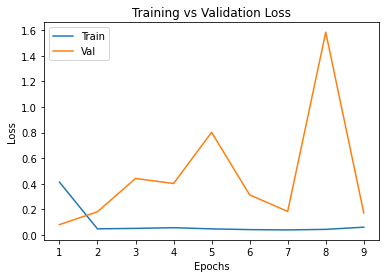

In [ ]:
# Training vs Validation Loss

x = list(range(1, 10))
plt.plot(x, df['loss'])
plt.plot(x, df['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend(labels=['Train', 'Val'])
plt.show()

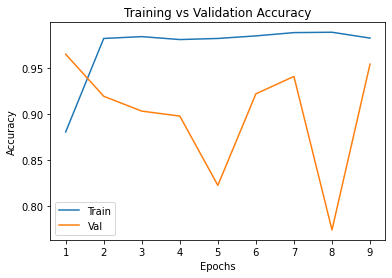

In [ ]:
# Training vs Validation Accuracy

plt.plot(x, df['accuracy'])
plt.plot(x, df['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend(labels=['Train', 'Val'])
plt.show()

In [ ]:
model.save('vgg.h5')

## Custom CNN Model v/s Transfer Learning Appraoch

We know that the training time increases exponentially with the neural network architecture increasing/deepening. In general, it could take hours/days to train a 3–5 layers neural network with a large scale dataset. Consequently, deploying VGG from scratch on a large scale dataset is a tiresome and computationally expensive task due to the depth and number of fully connected layers/nodes in the models’ architecture.

Transfer learning generally used for speeding up the training time and eventually improve the performance of the models’. 

As we can see, the custom trained CNN model yeilds an accuracy of ~86% and transfer learning yields an accuracy of ~95%. Hence we go ahead with the VGG16 model.